#### 1.生成数据，选择了4个点，并在这四个点附近随机产生一堆数据,np.random.randn是从标准正态中返回值

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 先在四个中心点附近产生一堆数据
real_center = [(1, 1), (1, 2), (2, 2), (2, 1)]
point_number = 50

points_x = []
points_y = []

for center in real_center:
    offset_x, offset_y = np.random.randn(point_number) * 0.3, np.random.randn(point_number) * 0.25
    x_val, y_val = center[0] + offset_x, center[1] + offset_y

    points_x.append(x_val)
    points_y.append(y_val)
    
points_x = np.concatenate(points_x)
points_y = np.concatenate(points_y)


In [98]:
points_x.shape,points_y.shape

((200,), (200,))

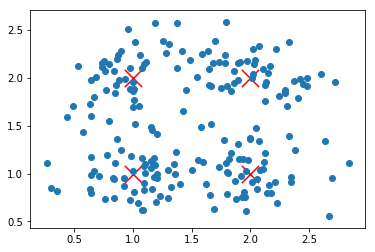

In [45]:
plt.scatter([1,1,2,2],[1,2,1,2],marker='x',s=300,color='r')
plt.scatter(points_x,points_y)

#### 2.初始化：随机选择4个聚类中心点

In [36]:
K         = 4
#p_list中存放的是所有的200个点对应的x,y坐标
p_list    = np.stack([points_x, points_y], axis=1)
index     = np.random.choice(len(p_list), size=K)
centeroid = p_list[index]

# print(p_list)
print(centeroid)

[[2.16193277 0.88284554]
 [1.15641409 1.12971014]
 [1.48878299 2.18500698]
 [0.98265175 1.1818232 ]]


#### cluster assignment

经过cluster assignment后的簇


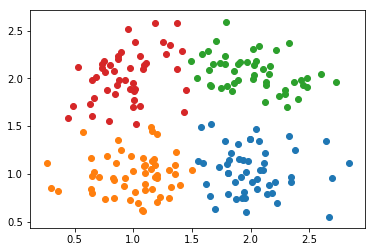

In [94]:
points_set = {key: [] for key in range(K)}
#循环访问200个点的坐标,将每个点与聚类中心的四个点计算距离，并返回索引，再根据返回的索引，将点加入到对应的list中
for p in p_list:
    nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
    points_set[nearest_index].append(p)

print('经过cluster assignment后的簇')
plt.scatter(np.array(points_set[0])[:,0],np.array(points_set[0])[:,1])
plt.scatter(np.array(points_set[1])[:,0],np.array(points_set[1])[:,1])
plt.scatter(np.array(points_set[2])[:,0],np.array(points_set[2])[:,1])
plt.scatter(np.array(points_set[3])[:,0],np.array(points_set[3])[:,1])



#### move centroids

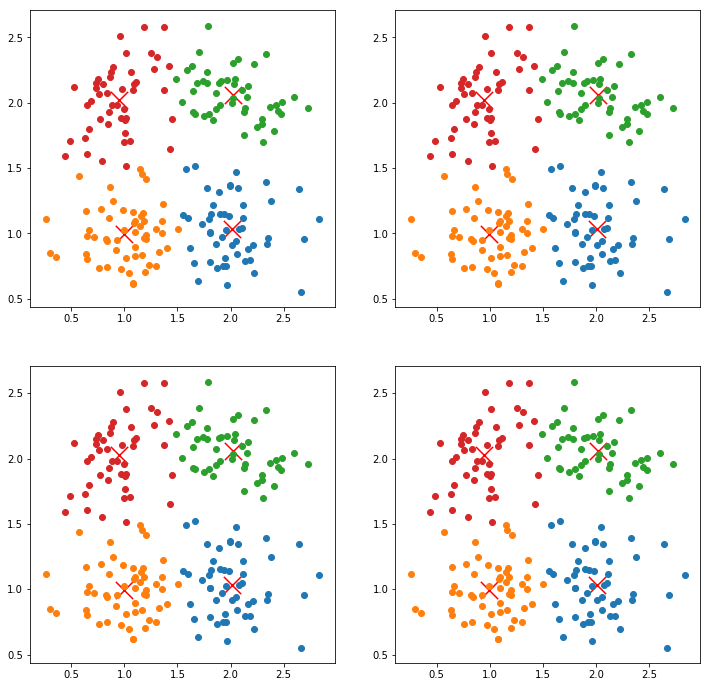

In [95]:
#循环访问points_set中的四个list,计算四个list中点的均值，从而更新聚类中心centeroid
fig=plt.figure(figsize=(12,12))
j=1
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    centeroid[k_index, 0] = sum(p_xs) / len(p_set)
    centeroid[k_index, 1] = sum(p_ys) / len(p_set)
    plt.subplot(2,2,k_index+1)
    plt.scatter([centeroid[0][0],centeroid[1][0],centeroid[2][0],centeroid[3][0]],[centeroid[0][1],centeroid[1][1],centeroid[2][1],centeroid[3][1]],marker='x',color='r',s=300)

#     plt.scatter(points_x,points_y)
    plt.scatter(np.array(points_set[0])[:,0],np.array(points_set[0])[:,1])
    plt.scatter(np.array(points_set[1])[:,0],np.array(points_set[1])[:,1])
    plt.scatter(np.array(points_set[2])[:,0],np.array(points_set[2])[:,1])
    plt.scatter(np.array(points_set[3])[:,0],np.array(points_set[3])[:,1])
    



#### 循环上述过程10次，即：cluster assignment,move centroids

[[2.01358778 1.03480385]
 [0.99839012 0.99555207]
 [2.02362242 2.06038158]
 [0.94655998 2.02375532]]


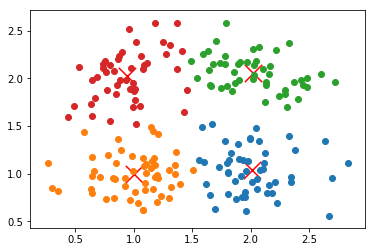

In [96]:
for i in range(10):
    points_set = {key: [] for key in range(K)}

    for p in p_list:
        nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
        points_set[nearest_index].append(p)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        centeroid[k_index, 0] = sum(p_xs) / len(p_set)
        centeroid[k_index, 1] = sum(p_ys) / len(p_set)
print(centeroid)

plt.scatter([centeroid[0][0],centeroid[1][0],centeroid[2][0],centeroid[3][0]],[centeroid[0][1],centeroid[1][1],centeroid[2][1],centeroid[3][1]],marker='x',color='r',s=300)

plt.scatter(np.array(points_set[0])[:,0],np.array(points_set[0])[:,1])
plt.scatter(np.array(points_set[1])[:,0],np.array(points_set[1])[:,1])
plt.scatter(np.array(points_set[2])[:,0],np.array(points_set[2])[:,1])
plt.scatter(np.array(points_set[3])[:,0],np.array(points_set[3])[:,1])

#### 选择不同的K，每次迭代100次，观察kmeans的loss，发现当K＝4时，处于拐点的位置，当K>4时，loss的下降比较缓慢,可以得到针对当前数据，K＝4是比较好的聚类数

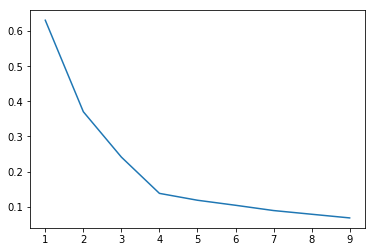

In [6]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(p_list)
    loss.append(kmeans.inertia_ / point_number / K)
    
plt.plot(range(1, 10), loss)
plt.show()
